<a href="https://colab.research.google.com/github/harshavardhansannithi/ARDS-using-Machine-learning/blob/main/Random_Forest_vs_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [15]:
# Load your dataset (replace with your actual data)
data = pd.read_csv("/content/drive/MyDrive/survey lung cancer.csv")

In [16]:
# Separate features and target variable
X = data.drop("LUNG_RECRUITMENT", axis=1)
y = data["LUNG_RECRUITMENT"]

In [17]:
# Feature scaling (optional)
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Assuming 'column_name' is the column containing string values
le = LabelEncoder()
X['GENDER'] = le.fit_transform(X['GENDER'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [18]:
data.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [19]:
data["LUNG_RECRUITMENT"].describe()

count     309
unique      2
top       YES
freq      270
Name: LUNG_RECRUITMENT, dtype: object

In [20]:
X.head()
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   GENDER                 309 non-null    int64
 1   AGE                    309 non-null    int64
 2   SMOKING                309 non-null    int64
 3   YELLOW_FINGERS         309 non-null    int64
 4   ANXIETY                309 non-null    int64
 5   PEER_PRESSURE          309 non-null    int64
 6   CHRONIC DISEASE        309 non-null    int64
 7   FATIGUE                309 non-null    int64
 8   ALLERGY                309 non-null    int64
 9   WHEEZING               309 non-null    int64
 10  ALCOHOL CONSUMING      309 non-null    int64
 11  COUGHING               309 non-null    int64
 12  SHORTNESS OF BREATH    309 non-null    int64
 13  SWALLOWING DIFFICULTY  309 non-null    int64
 14  CHEST PAIN             309 non-null    int64
dtypes: int64(15)
memory usage: 36.3 KB


In [21]:
X_scaled = scaler.fit_transform(X)

In [22]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [23]:
# Random Forest Model
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)  # Experiment with hyperparameters
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

In [24]:
# Decision Tree Model
dt_clf = DecisionTreeClassifier(max_depth=5)  # Experiment with hyperparameters
dt_clf.fit(X_train, y_train)
y_pred_dt = dt_clf.predict(X_test)

In [39]:
# Assuming 'NO' is the negative class and 'YES' is the positive class
positive_class_label = 'YES'

print("Random Forest:")
score_rf = round(accuracy_score(y_test, y_pred_rf)*100,2)
print("The accuracy score achieved using RF is: "+str(score_rf)+" %")
print(f"Precision: {precision_score(y_test, y_pred_rf, pos_label=positive_class_label)}")
print(f"Recall: {recall_score(y_test, y_pred_rf, pos_label=positive_class_label)}")
print(f"F1-score: {f1_score(y_test, y_pred_rf, pos_label=positive_class_label)}")


Random Forest:
The accuracy score achieved using RF is: 97.85 %
Precision: 0.9883720930232558
Recall: 0.9883720930232558
F1-score: 0.9883720930232558


In [40]:
# Assuming 'NO' is the negative class and 'YES' is the positive class
positive_class_label = 'YES'

print("\nDecision Tree:")
score_dt = round(accuracy_score(y_test, y_pred_dt)*100,2)
print("The accuracy score achieved using DT is: "+str(score_dt)+" %")
print(f"Precision: {precision_score(y_test, y_pred_dt, pos_label=positive_class_label)}")
print(f"Recall: {recall_score(y_test, y_pred_dt, pos_label=positive_class_label)}")
print(f"F1-score: {f1_score(y_test, y_pred_dt, pos_label=positive_class_label)}")



Decision Tree:
The accuracy score achieved using DT is: 92.47 %
Precision: 0.9876543209876543
Recall: 0.9302325581395349
F1-score: 0.9580838323353293


In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Random Forest classifier with cross-validation
rf_clf = RandomForestClassifier(random_state=42)
clf = GridSearchCV(rf_clf, param_grid, cv=5)

# Fit the model with cross-validation
clf.fit(X_train, y_train)

# Print the best parameters and performance
print(f"Best parameters: {clf.best_params_}")
print(f"Best score: {clf.best_score_}")


Best parameters: {'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 10}
Best score: 0.8892177589852007


In [32]:
from sklearn.model_selection import cross_val_score


The optimal n_estimators value is: 7


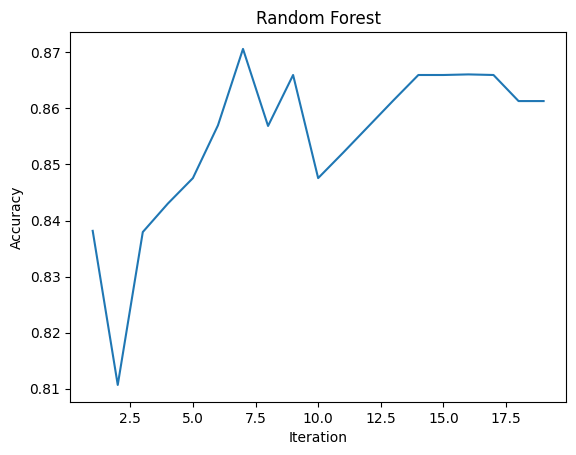

In [35]:
# Assuming X_train and y_train are your training data and labels
# Perform cross-validation for different n_estimators values
n_estimators_values = list(range(1, 15))  # You can adjust the range based on your preference
cv_scores = []

for n_estimators in n_estimators_values:
    rf = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')  # 5-fold cross-validation
    cv_scores.append(np.mean(scores))

# Find the optimal n_estimators value with the highest cross-validated accuracy
optimal_n_estimators = n_estimators_values[np.argmax(cv_scores)]
print(f"The optimal n_estimators value is: {optimal_n_estimators}")

# Plotting the cross-validated accuracy for different n_estimators values (optional)
plt.plot(n_estimators_values, cv_scores)
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Random Forest')
plt.show()

The optimal max_depth value is: 1


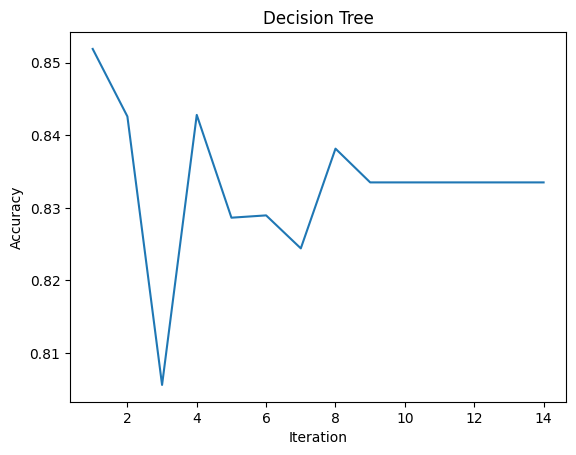

In [36]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt

# Assuming X_train and y_train are your training data and labels
# Perform cross-validation for different max_depth values
max_depth_values = list(range(1, 15))  # You can adjust the range based on your preference
cv_scores = []

for max_depth in max_depth_values:
    dt = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    scores = cross_val_score(dt, X_train, y_train, cv=5, scoring='accuracy')  # 5-fold cross-validation
    cv_scores.append(np.mean(scores))

# Find the optimal max_depth value with the highest cross-validated accuracy
optimal_max_depth = max_depth_values[np.argmax(cv_scores)]
print(f"The optimal max_depth value is: {optimal_max_depth}")

# Plotting the cross-validated accuracy for different max_depth values (optional)
plt.plot(max_depth_values, cv_scores)
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Decision Tree')
plt.show()


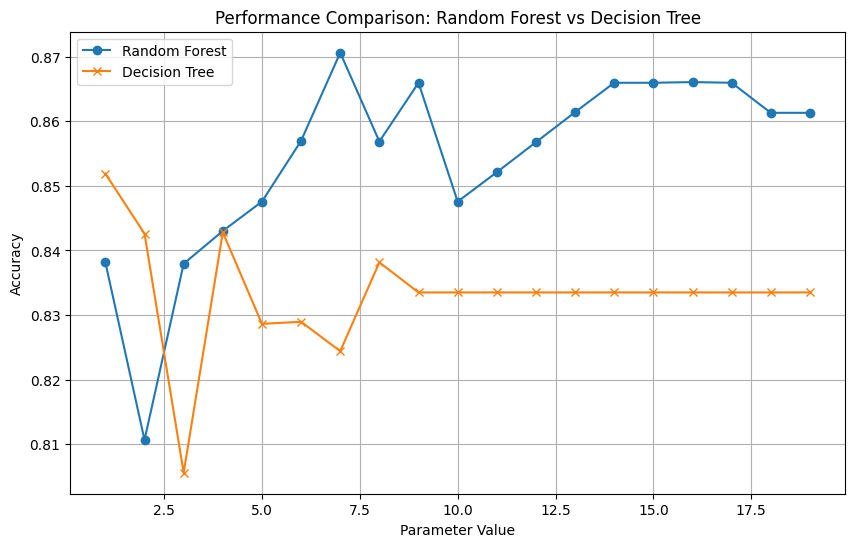

In [37]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# Assuming X_train and y_train are your training data and labels

# Define the parameter values to evaluate
parameter_values = list(range(1, 20))  # You can adjust the range based on your preference

# Initialize lists to store performance metrics for Random Forest and Decision Tree
rf_accuracy_scores = []
dt_accuracy_scores = []

# Evaluate models for each parameter value
for param_value in parameter_values:
    # Random Forest
    rf = RandomForestClassifier(n_estimators=param_value, random_state=42)
    rf_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')
    rf_accuracy_scores.append(np.mean(rf_scores))

    # Decision Tree
    dt = DecisionTreeClassifier(max_depth=param_value, random_state=42)
    dt_scores = cross_val_score(dt, X_train, y_train, cv=5, scoring='accuracy')
    dt_accuracy_scores.append(np.mean(dt_scores))

# Plotting the performance metrics
plt.figure(figsize=(10, 6))

# Plot Random Forest performance
plt.plot(parameter_values, rf_accuracy_scores, label='Random Forest', marker='o')

# Plot Decision Tree performance
plt.plot(parameter_values, dt_accuracy_scores, label='Decision Tree', marker='x')

plt.xlabel('Parameter Value')
plt.ylabel('Accuracy')
plt.title('Performance Comparison: Random Forest vs Decision Tree')
plt.legend()
plt.grid(True)
plt.show()


In [41]:
scores = [score_rf,score_dt]
algorithms = ["Random Forest","Decision Tree"]

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Random Forest is: 97.85 %
The accuracy score achieved using Decision Tree is: 92.47 %


In [42]:
import seaborn as sns

<Axes: xlabel='Algorithms', ylabel='Accuracy score'>

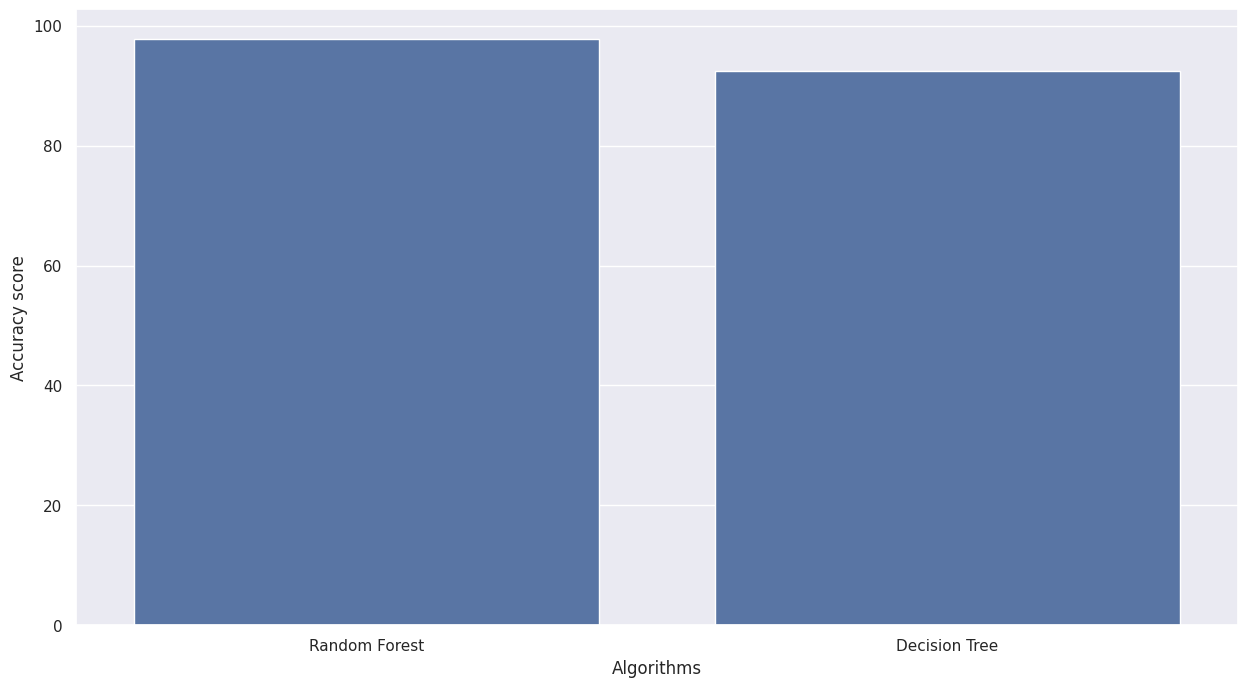

In [43]:
# Install the matplotlib module if necessary
!pip install matplotlib

# Import the matplotlib.pyplot module
import matplotlib.pyplot as plt

# Set the figure size
sns.set(rc={'figure.figsize':(15,8)})

# Set the x-axis label
plt.xlabel("Algorithms")

# Set the y-axis label
plt.ylabel("Accuracy score")

# Create a bar plot
sns.barplot(x=algorithms, y=scores)